In [196]:
# !pip install tensorflow

In [197]:
import tensorflow as tf
import pandas as pd

# Import Layers, Optimizers, and the Model Creation Function:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam  # Optimize training and weight calculation
from tensorflow.keras.models import Model  # Combine our layers and for the Neural Network

In [252]:
data = pd.read_csv('C:/Users/migue/Desktop/MachineLearning/prueba/rileys_data.csv')
data.head(1)

,AIRLINE,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,DEP_DELAY,CRS_ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,...,dest_SNWD,dest_AWND,dest_PRCP,CRS_DEP_Datetime,15_DELAYED,year,month,day,day_of_week,hour
0,Spirit Air Lines,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",-2.0,2041,-1.0,0.0,0.0,...,0.0,55.0,8.0,2020-02-23 18:40:00,0,2020,2,23,6,18


In [199]:
print('Delayed flights: ',len(data[data['15_DELAYED']==1]))

Delayed flights:  275819


In [200]:
data.columns

Index(['AIRLINE', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY', 'DEP_DELAY',
       'CRS_ARR_TIME', 'ARR_DELAY', 'CANCELLED', 'DIVERTED', 'DISTANCE',
       'ori_TMIN', 'ori_TMAX', 'ori_SNOW', 'ori_SNWD', 'ori_AWND', 'ori_PRCP',
       'dest_TMIN', 'dest_TMAX', 'dest_SNOW', 'dest_SNWD', 'dest_AWND',
       'dest_PRCP', 'CRS_DEP_Datetime', '15_DELAYED', 'year', 'month', 'day',
       'day_of_week', 'hour'],
      dtype='object')

In [201]:
used_data=data.loc[:,~data.columns.isin(['ORIGIN_CITY', 'DEST_CITY','DEP_DELAY','ARR_DELAY','CANCELLED','DIVERTED','CRS_DEP_Datetime','CRS_ARR_TIME'])].copy()
used_data.columns

Index(['AIRLINE', 'ORIGIN', 'DEST', 'DISTANCE', 'ori_TMIN', 'ori_TMAX',
       'ori_SNOW', 'ori_SNWD', 'ori_AWND', 'ori_PRCP', 'dest_TMIN',
       'dest_TMAX', 'dest_SNOW', 'dest_SNWD', 'dest_AWND', 'dest_PRCP',
       '15_DELAYED', 'year', 'month', 'day', 'day_of_week', 'hour'],
      dtype='object')

In [202]:

# Define a function to replace infrequent categories with 'Other'
def replace_infrequent_categories(df, categorical_cols, threshold=0.05, other_label='Other'):
    for col in categorical_cols:
        counts = df[col].value_counts(normalize=True)
        infrequent_categories = counts[counts < threshold].index
        df[col] = df[col].replace(infrequent_categories, other_label)
    return df

# Define threshold for infrequent categories (adjust as needed)
threshold = 0.035

In [203]:
X = used_data.drop(['15_DELAYED'], axis=1)
y = used_data['15_DELAYED']


categorical_cols = ['AIRLINE','ORIGIN','DEST']
numeric_cols = [col for col in used_data.columns if col not in categorical_cols]
numeric_cols.remove('15_DELAYED')
# Replace infrequent categories with 'Other'
df_processed = replace_infrequent_categories(X, categorical_cols, threshold)

In [204]:
print('airline  ',len(used_data['AIRLINE'].unique()))
print('origin  ',len(used_data['ORIGIN'].unique()))
print('dest  ',len(used_data['DEST'].unique()))
print('airline  ',len(df_processed['AIRLINE'].unique()))
print('origin  ',len(df_processed['ORIGIN'].unique()))
print('dest  ',len(df_processed['DEST'].unique()))

airline   17
origin   221
dest   220
airline   11
origin   6
dest   6


In [205]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Inicializar el codificador OneHotEncoder sin matriz dispersa

encoder = OneHotEncoder(sparse_output=False)

# Ajustar y transformar los datos categóricos usando OneHotEncoder
encoded_data = encoder.fit_transform(df_processed[categorical_cols])

# Crear un DataFrame con las columnas codificadas
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))



# Concatenar el DataFrame original con el DataFrame codificado
encoded_data = pd.concat([df_processed.reset_index(drop=True), encoded_df], axis=1)

# Eliminar las columnas originales categóricas del DataFrame original
encoded_data.drop(categorical_cols, axis=1, inplace=True)


In [206]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
encoded_data[numeric_cols] = scaler.fit_transform(encoded_data[numeric_cols])
encoded_data.head(1)


,DISTANCE,ori_TMIN,ori_TMAX,ori_SNOW,ori_SNWD,ori_AWND,ori_PRCP,dest_TMIN,dest_TMAX,dest_SNOW,...,ORIGIN_DEN,ORIGIN_DFW,ORIGIN_ORD,ORIGIN_Other,DEST_ATL,DEST_CLT,DEST_DEN,DEST_DFW,DEST_ORD,DEST_Other
0,0.452015,0.043486,0.323359,-0.103983,-0.14447,-0.288833,-0.311327,-0.347657,-0.623824,-0.103003,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [207]:
from sklearn.model_selection import train_test_split

X = encoded_data # Asegúrate de reemplazar 'TARGET_COLUMN' con el nombre de tu columna objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777)

In [241]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

# Definir el modelo
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilar el modelo
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy',tf.keras.metrics.Recall()])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=300,validation_data=(X_test, y_test))




c:\Users\migue\Desktop\MachineLearning\prueba\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
31397/31397 ━━━━━━━━━━━━━━━━━━━━ 38s 1ms/step - accuracy: 0.7818 - loss: 0.4913 - recall_7: 0.0600 - val_accuracy: 0.7849 - val_loss: 0.4795 - val_recall_7: 0.1213
Epoch 2/300
31397/31397 ━━━━━━━━━━━━━━━━━━━━ 38s 1ms/step - accuracy: 0.7859 - loss: 0.4786 - recall_7: 0.0999 - val_accuracy: 0.7862 - val_loss: 0.4761 - val_recall_7: 0.1321
Epoch 3/300
31397/31397 ━━━━━━━━━━━━━━━━━━━━ 33s 1ms/step - accuracy: 0.7862 - loss: 0.4773 - recall_7: 0.1160 - val_accuracy: 0.7870 - val_loss: 0.4750 - val_recall_7: 0.0950
Epoch 4/300
31397/31397 ━━━━━━━━━━━━━━━━━━━━ 33s 1ms/step - accuracy: 0.7871 - loss: 0.4750 - recall_7: 0.1233 - val_accuracy: 0.7859 - val_loss: 0.4753 - val_recall_7: 0.0659
Epoch 5/300
31397/31397 ━━━━━━━━━━━━━━━━━━━━ 46s 1ms/step - accuracy: 0.7879 - loss: 0.4738 - recall_7: 0.1244 - val_accuracy: 0.7880 - val_loss: 0.4750 - val_recall_7: 0.1348
Epoch 6/300
31397/31397 ━━━━━━━━━━━━━━━━━━━━ 50s 2ms/step - accuracy: 0.7883 - loss: 0.4729 - recall_7: 0.1249 - val_acc

31397/31397 ━━━━━━━━━━━━━━━━━━━━ 20s 642us/step
7850/7850 ━━━━━━━━━━━━━━━━━━━━ 5s 641us/step


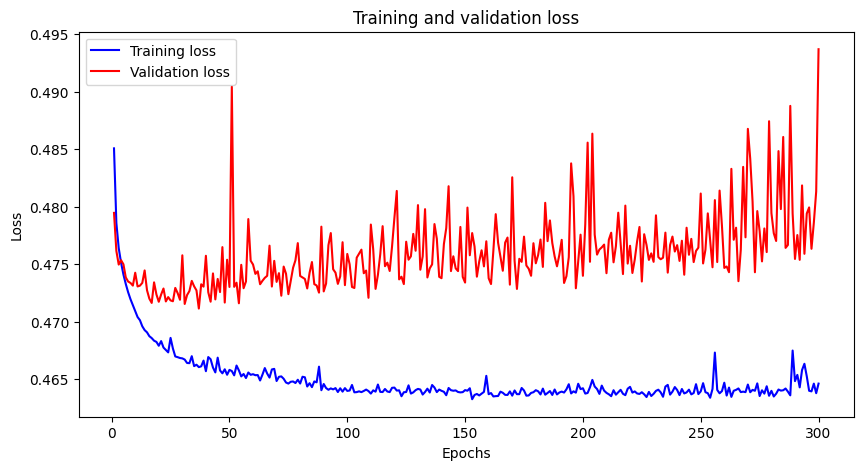

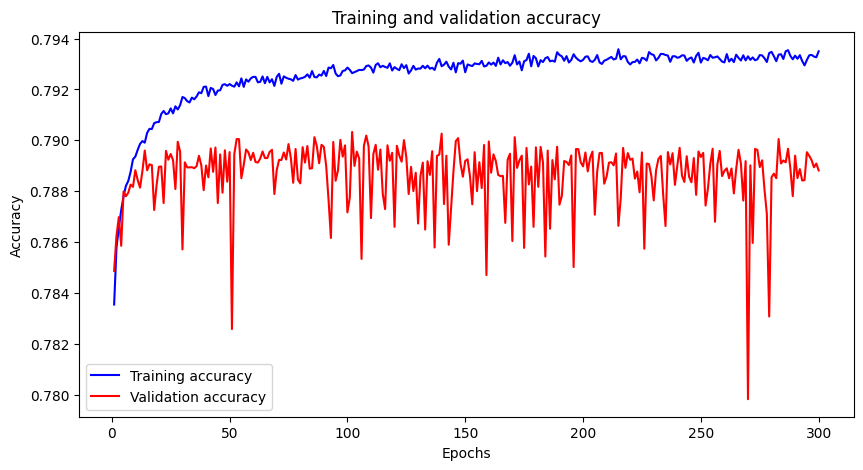

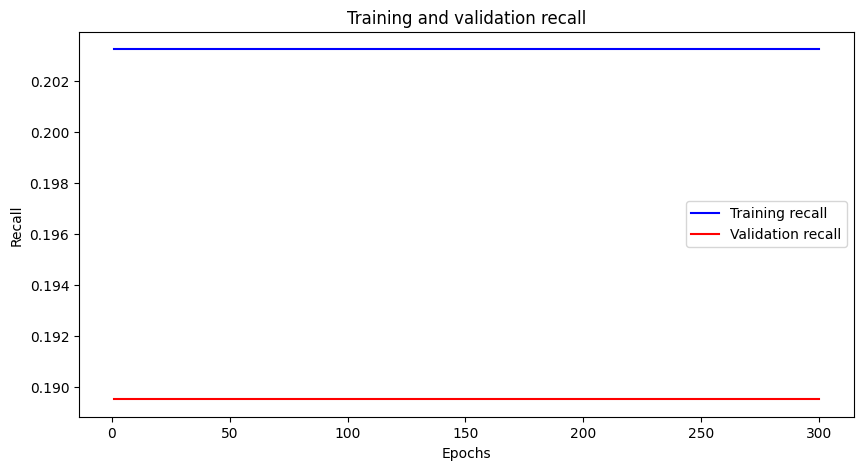

In [244]:
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score

# Obtener predicciones del conjunto de entrenamiento y validación
train_predictions = model.predict(X_train)
val_predictions = model.predict(X_test)

# Calcular la sensibilidad (recall)
train_recall = recall_score(y_train, train_predictions.round())
val_recall = recall_score(y_test, val_predictions.round())

# Obtener información de la historia del entrenamiento
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Plotear la pérdida
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotear la precisión
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotear la sensibilidad (recall)
plt.figure(figsize=(10, 5))
plt.plot(epochs, [train_recall]*len(epochs), 'b', label='Training recall')
plt.plot(epochs, [val_recall]*len(epochs), 'r', label='Validation recall')
plt.title('Training and validation recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.show()


In [248]:
from sklearn.metrics import recall_score,precision_score,accuracy_score,classification_report
val_recall = recall_score(y_test, val_predictions.round())
val_precision = precision_score(y_test, val_predictions.round())
val_accuracy = accuracy_score(y_test, val_predictions.round())
classification_report_1 = classification_report(y_test, val_predictions.round())
print("recall value: ",val_recall)
print("precision value: ",val_precision)
print("accuracy value: ",val_accuracy)
print(classification_report_1)

recall value:  0.18950559024248584
precision value:  0.5544875199150292
accuracy value:  0.7888148805803171
              precision    recall  f1-score   support

           0       0.81      0.96      0.88    196077
           1       0.55      0.19      0.28     55096

    accuracy                           0.79    251173
   macro avg       0.68      0.57      0.58    251173
weighted avg       0.75      0.79      0.75    251173

